In [1]:
!pip install git+https://github.com/imanring/BSTPP.git

  Cloning https://github.com/imanring/BSTPP.git to /tmp/pip-req-build-4bsvyi4m
  Running command git clone --filter=blob:none --quiet https://github.com/imanring/BSTPP.git /tmp/pip-req-build-4bsvyi4m
  Resolved https://github.com/imanring/BSTPP.git to commit b32ace1a87699ad54752e96b0ecf2bb84e272307
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for BSTPP, since package 'wheel' is not installed.
  Running setup.py install for BSTPP ... done


In [1]:
from bstpp.main import Point_Process_Model
import numpyro.distributions as dist
import numpy as np

In [2]:
import geopandas as gpd
A = gpd.read_file('data/Chicago/Boundaries - Community Areas (current).zip')

In [3]:
column_names = ['POP_DENS','VAC_HU','HH_SIZE']
model_name = 'cox_hawkes'
model = Point_Process_Model('data/Chicago/Crime_Incident_Reports/sr_2022_xyt.csv',A,model=model_name,
                            #spatial_cov='data/Chicago/spat_cov.shp',cov_names = column_names,
                            a_0=dist.Normal(1,5), alpha = dist.Beta(1,1)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:70: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  args['A_area'] = A.area.sum()/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))
/home/imanring/PointProcess/Cox_Hawkes/cox_hawkes/lib/python3.10/site-packages/geopandas/geodataframe.py:2189: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


In [4]:
import pickle
pre_run = True
if pre_run:
    with open(f'output/Chicago_Shootings/{model_name}/output.pkl', 'rb') as f:
        output = pickle.load(f)
    model.mcmc = output['mcmc']
    model.mcmc_samples = output['samples']

In [4]:
model.run_mcmc()

sample: 100%|█| 1500/1500 [3:08:43<00:00,  7.55s/it, 255 steps of size 1.55e-0



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0      1.51      0.59      1.48      0.60      2.44    375.73      1.00
         alpha      0.43      0.14      0.40      0.25      0.65    572.07      1.00
          beta      0.01      0.00      0.01      0.01      0.02    967.92      1.00
         scale      2.73      0.30      2.70      2.22      3.16    269.88      1.00
      sigmax_2      0.00      0.00      0.00      0.00      0.00   1524.12      1.00
  z_spatial[0]     -1.67      0.21     -1.66     -1.98     -1.32    286.48      1.00
  z_spatial[1]      0.03      0.21      0.01     -0.35      0.34    316.63      1.03
  z_spatial[2]     -0.05      0.33     -0.05     -0.56      0.51    385.14      1.02
  z_spatial[3]      0.19      0.21      0.19     -0.14      0.51    449.46      1.01
  z_spatial[4]      0.47      0.26      0.46      0.02      0.89    337.25      1.03
  z_spatial[5]      1.31      0.23      1.30      0.95      1.68

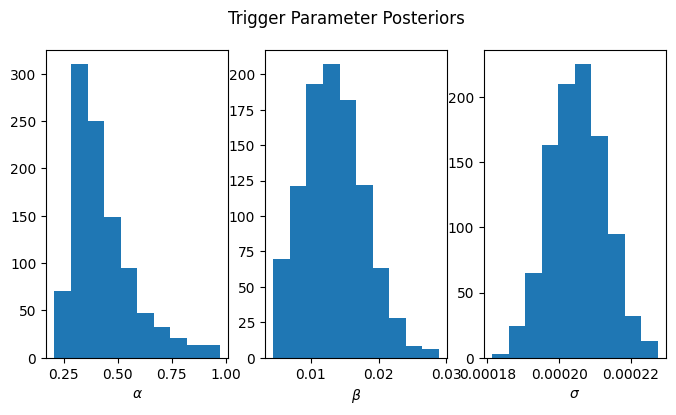

In [7]:
r = model.plot_trigger_posterior(f'output/Chicago_Shootings/{model_name}/trig_post.png')

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:441: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  intersect = gpd.overlay(self.comp_grid, self.A, how='intersection')


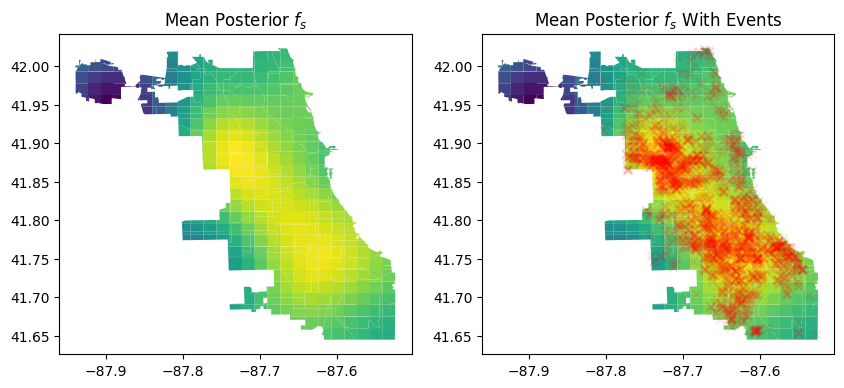

In [9]:
model.plot_spatial_background(f'output/Chicago_Shootings/{model_name}/f_s_post_mean.png')

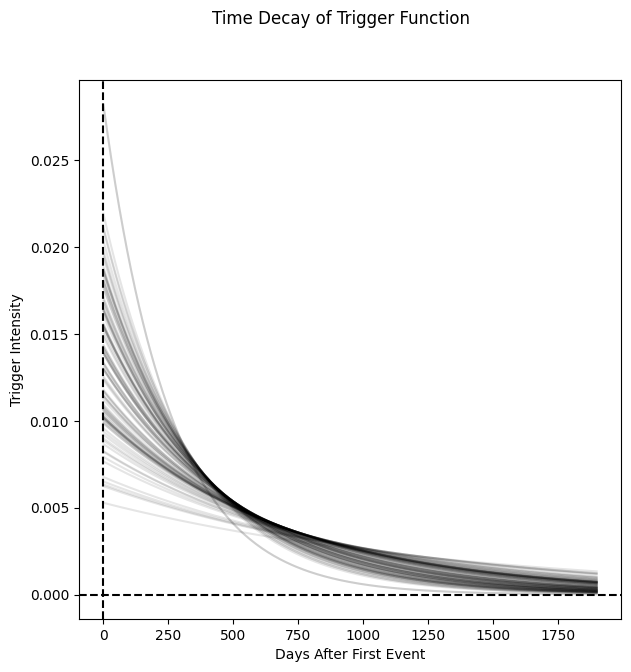

Mean trigger time: 544.68 days


In [6]:
model.plot_trigger_time_decay()

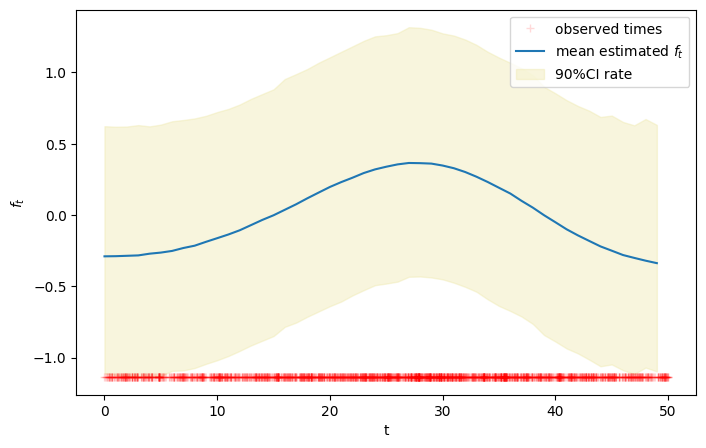

In [9]:
model.plot_temporal_background(f'output/Chicago_Shootings/{model_name}/f_t_post_mean.png')

In [10]:
model.cov_weight_post_summary()

Exception: Spatial covariates were not included in the model.

In [17]:
model_name = 'lgcp'
ss_mod = Point_Process_Model('data/Chicago/ShotSpotter/ss_2022_xyt.csv',A,model=model_name,
                            #spatial_cov='data/Chicago/spat_cov.shp',cov_names = column_names,
                            a_0=dist.Normal(0,5)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:70: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  args['A_area'] = A.area.sum()/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))
/home/imanring/PointProcess/Cox_Hawkes/cox_hawkes/lib/python3.10/site-packages/geopandas/geodataframe.py:2189: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


In [19]:
ss_mod.run_mcmc(output_file=f'output/ShotSpotter/{model_name}/output.pkl')

sample: 100%|████████████████████████████████████| 1500/1500 [02:58<00:00,  8.40it/s, 511 steps of size 6.65e-03. acc. prob=0.92]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0      7.64      0.41      7.66      6.93      8.32    344.49      1.00
         scale      2.76      0.14      2.77      2.52      2.98    266.90      1.00
  z_spatial[0]     -3.96      0.34     -3.92     -4.43     -3.41    220.28      1.00
  z_spatial[1]     -0.70      0.07     -0.69     -0.82     -0.58    514.67      1.00
  z_spatial[2]      0.06      0.10      0.06     -0.10      0.24    443.63      1.01
  z_spatial[3]      1.19      0.09      1.19      1.06      1.33    241.11      1.00
  z_spatial[4]      1.51      0.21      1.48      1.22      1.84    213.65      1.01
  z_spatial[5]      0.69      0.06      0.69      0.60      0.80    445.39      1.00
  z_spatial[6]     -0.97      0.10     -0.96     -1.12     -0.79    316.20      1.01
  z_spatial[7]      1.25      0.12      1.24      1.08      1.44    238.14      1.00
  z_spatial[8]     -1.47      0.13     -1.46     -1.65     -1.24

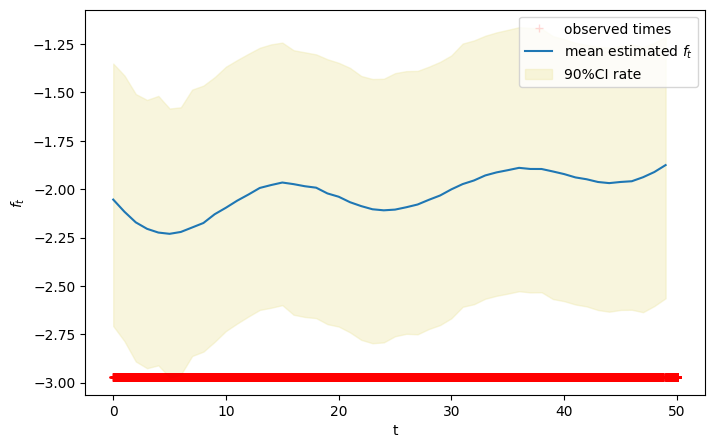

In [21]:
ss_mod.plot_temporal_background()

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:441: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  intersect = gpd.overlay(self.comp_grid, self.A, how='intersection')


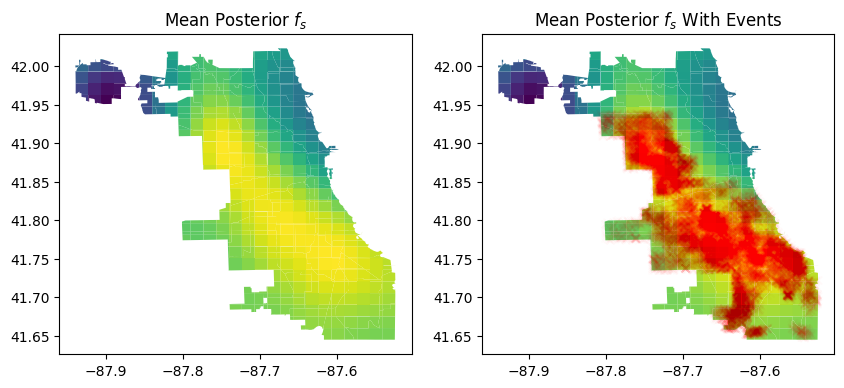

In [23]:
ss_mod.plot_spatial_background(alpha=0.01)

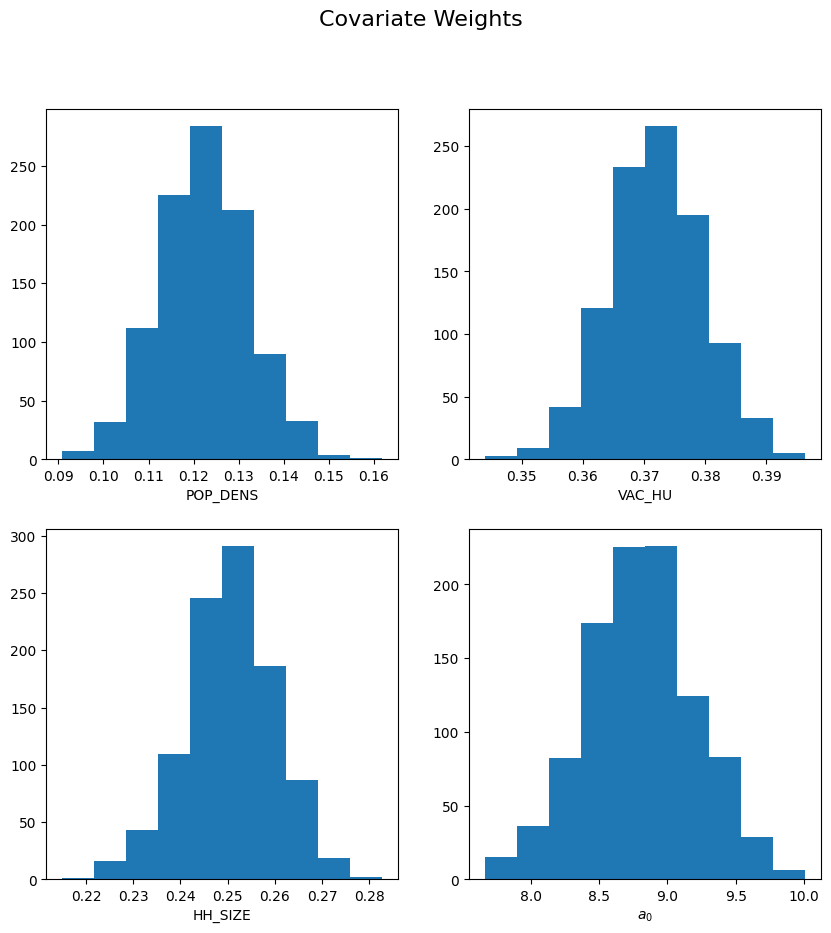

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
POP_DENS,0.122413,0.009934,12.322935,0.0,0.103596,0.141566
VAC_HU,0.372064,0.007694,48.359852,0.0,0.356889,0.386885
HH_SIZE,0.250668,0.009573,26.184711,0.0,0.230626,0.268845
a_0,8.802502,0.405239,21.721750,0.0,7.996888,9.603462


In [16]:
ss_mod.cov_weight_post_summary()

In [5]:
from bstpp.inference_functions import *
import pickle

output_dict = {}
#output_dict['model']=spatiotemporal_hawkes_model
output_dict['samples']=model.mcmc_samples
output_dict['mcmc']=model.mcmc
with open(f'output/Chicago_Shootings/{model_name}/output.pkl', 'wb') as handle:
    pickle.dump(output_dict, handle)

## Boko Haram Dataset

In [2]:
A = np.array([[3,15.5],[4,16.5]])
column_names = ['droughtstart_speibase', 'urban_ih_log', 'droughtyr_speigdm',
       'herb_gc', 'capdist', 'grass_ih_log', 'nlights_sd_log', 'water_gc_log',
       'pop_gpw_sd_log', 'pasture_ih']
model_name = 'lgcp'
model = Point_Process_Model('data/spt_data.csv',A,model=model_name,
                            spatial_cov='data/inc_spatial_cov.csv',cov_grid_size=(0.5,0.5),
                            cov_names = column_names,
                            a_0=dist.Normal(0,5)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:185: UserWarning: `keep_geom_type=True` in overlay resulted in 4466 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersect = gpd.overlay(comp_grid, spatial_cov, how='intersection')


In [3]:
import pickle
pre_run = True
if pre_run:
    with open(f'output/{model_name}/output_new.pkl', 'rb') as f:
        output = pickle.load(f)
    model.mcmc = output['mcmc']
    model.mcmc_samples = output['samples']
else:
    model.run_mcmc(output_file=f'output/{model_name}/output_new.pkl')

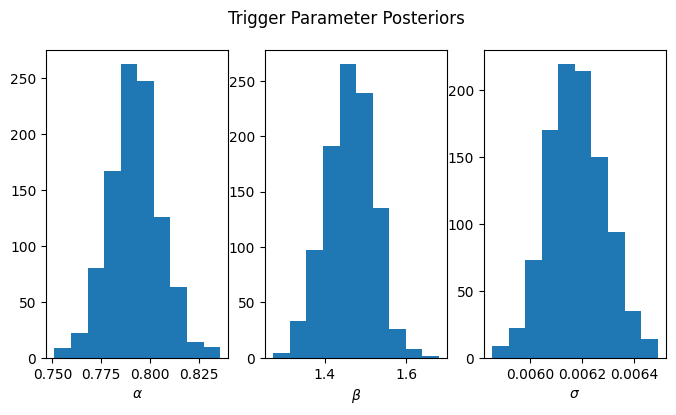

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
alpha,0.792135,0.013165,60.170200,0.0,0.766795,0.818655
beta,1.462121,0.057466,25.443113,0.0,1.348562,1.566254
sigma,0.006178,0.000109,56.548809,0.0,0.005972,0.006405


In [4]:
model.plot_trigger_posterior(f'output/{model_name}/trig_post.png')

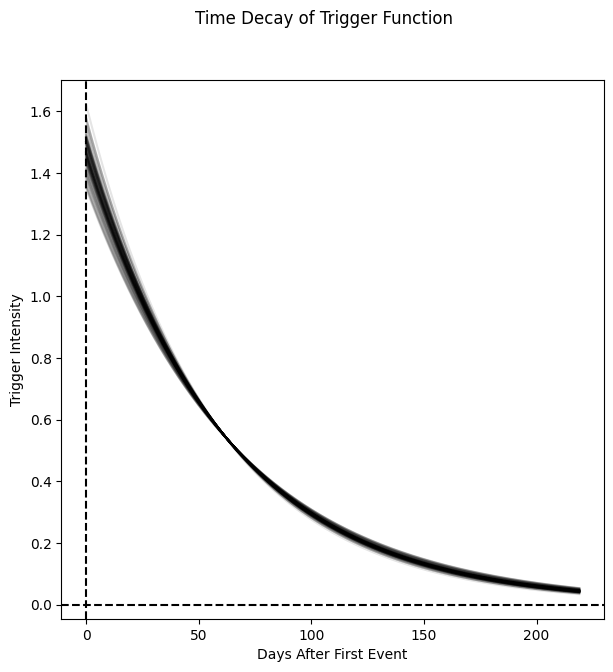

Mean trigger time: 62.57 days


In [5]:
model.plot_trigger_time_decay(f'output/{model_name}/trig_post_time_decay.png')

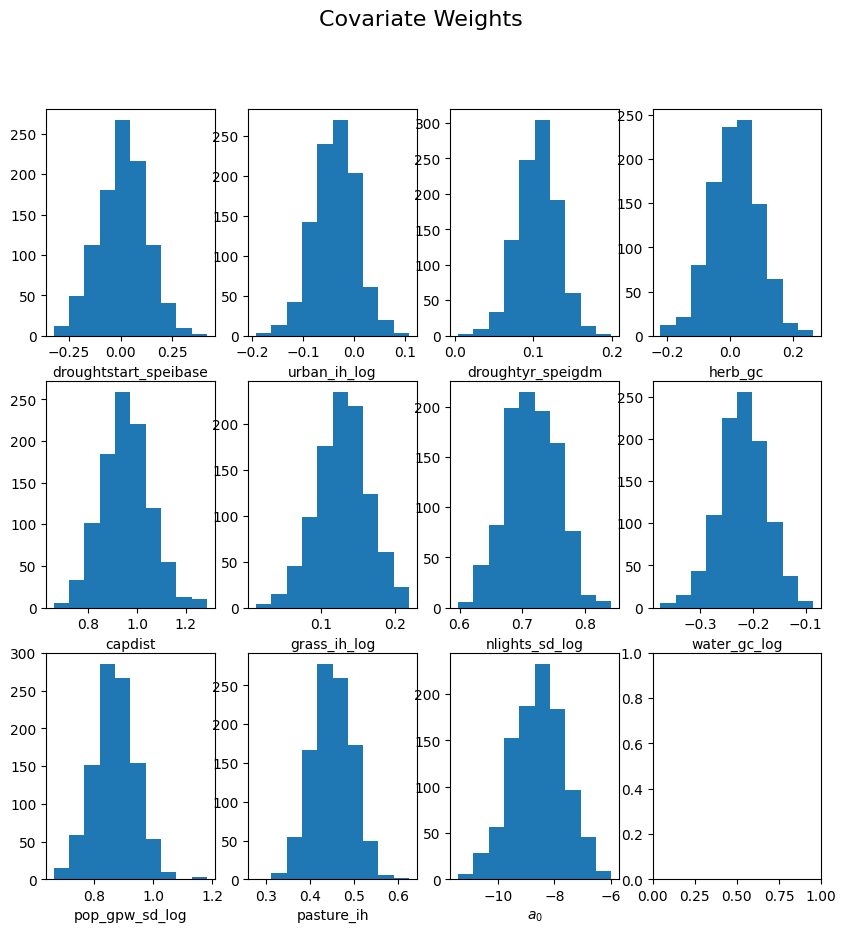

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
droughtstart_speibase,0.008720,0.115462,0.075520,0.939801,-0.221307,0.230259
urban_ih_log,-0.036204,0.042494,-0.851983,0.394223,-0.119318,0.046310
droughtyr_speigdm,0.106094,0.025635,4.138677,0.000035,0.054987,0.156701
herb_gc,0.013759,0.076866,0.179006,0.857933,-0.138507,0.160065
capdist,0.955510,0.098229,9.727407,0.000000,0.768980,1.154792
grass_ih_log,0.128781,0.034861,3.694112,0.000221,0.059132,0.196895
nlights_sd_log,0.715301,0.040167,17.808329,0.000000,0.638574,0.791000
water_gc_log,-0.219108,0.045496,-4.815953,0.000001,-0.314702,-0.128668
pop_gpw_sd_log,0.868945,0.071890,12.087190,0.000000,0.727300,1.006113
pasture_ih,0.449674,0.045622,9.856614,0.000000,0.362606,0.535760


In [7]:
model.cov_weight_post_summary(plot_file=f'output/{model_name}/cov_post_hist.png',
                              summary_file=f'output/{model_name}/cov_par_summary.csv')

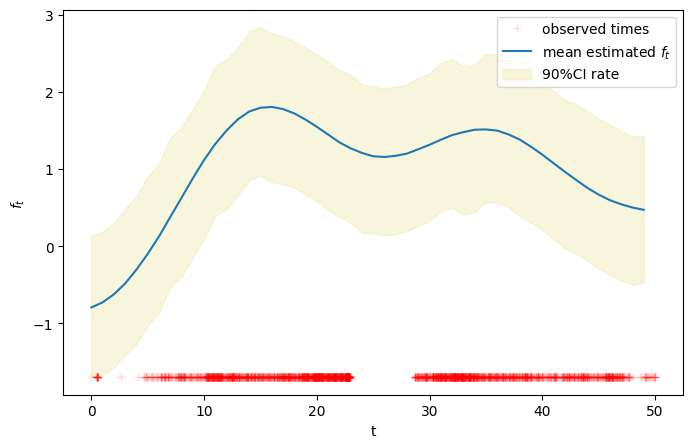

In [28]:
model.plot_temporal_background()#f'output/{model_name}/temporal_gp_post_mean.png')

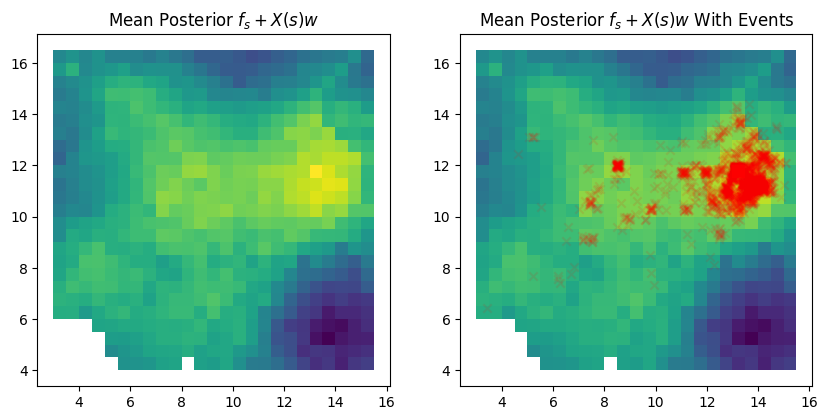

In [6]:
model.plot_spatial_background(f'output/{model_name}/spatial_gp_cov_post_mean.png',include_cov=True)